## Computing Cross Sections with Different Broadening Parameters
In this tutorial, we create a cross section for a molecule using different broadening coefficients. We choose the CO Li2015 line list from ExoMol. We compute the cross section using ExoMol's given H2-He broadening files and also using 2 custom broadening methods. One of these custom broadening methods has a constant relationship between the pressure broadening Lorentz coefficient and the angular quantum number (i.e. $ \gamma_{L}(J) =$ constant) and the other has a linearly decreasing relationship. 

We strongly recommend reading the [Quick Start](https://excalibur-alpha.readthedocs.io/en/latest/content/notebooks/quick_start.html) guide if you have not done so yet.

### Downloading line list and H2-He broadening files from ExoMol
Let's download the line list as we typically do. This will automatically download the H2-He broadening files from ExoMol as well. We import the relevant functions, define parameters, and call the functions.

In [1]:
''' Import module and define parameters'''

from excalibur.core import summon

species = 'CO'
database = 'ExoMol'

summon(database = database, species = species)  # Download CO line list


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 12C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
This file is already downloaded. Moving on.
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...

This file is already downloaded. Moving on.

This file is already downloaded. Moving on.

Line list ready.



### Adding custom broadening files
Now, let's create our custom broadening file and add them to the directory. To do this, we create numpy arrays and write them to a file. For both the constant and linearly decreasing relationships, the values for $J$, $\gamma_{L}(J)$, and $n_{L}$ are selected as per ExoMol's recommendations [CITE]. Technically, there is already an option for 'fixed' broadening in Excalibur, so we don't need to create a separate broadening file for that. However, for the purposes of this tutorial, we will demonstrate it.

In [2]:
'''Creating custom fixed broadening file to use in cross section computations'''

import numpy as np

# Populate arrays

J = np.linspace(0, 80, num = 81) # Rotational quantum numbers from J = 0 to J = 80
gamma_L_0 = 0.07 * np.ones(81) # Lorentzian HWHM is 0.07 for all J
n_L = 0.5 * np.ones(81) # Temperature exponent is 0.5 for all J


Now that we have defined the necessary variables, we call the `write_broadening_file` function to write these arrays to a file and place it in the correct folder. This function requires at least 5 parameters, the name of the file (`broadening_file`), the data to be written (`data`), the 'input' directory (`input_dir`), the name of the molecule (`species`), and the database (`database`).

The 3 arrays we just created should be combined into 1 array prior to calling the `write_broadening_file` function. This can be done using `np.stack`, as shown below. Make sure to keep the same order of the arrays as well (`J` then `gamma_L_0` then `n_L`).

The variable `input_dir` should be set to './input/' unless you have edited the file structure Excalibur automatically creates.

In [3]:
'''Write broadening parameters to file'''

from excalibur.broadening import write_broadening_file

data = np.stack((J, gamma_L_0, n_L))  # Combine arrays into 1 array to pass into write_broadening_file function
broadening_file = 'constant.broad' # Name of the file we will save data to
input_dir = './input/' # Top level input directory that contains line list data for all species

write_broadening_file(broadening_file, data, input_dir, species, database) # Create broadening file

Great, we have added our first custom broadening file! Let's do the same for the broadening file where $\gamma_{L}(J)$ decreases linearly for increasing $J$. The steps are the same, except `gamma_L_0` will be different. For simplicity, we just redefine this variable, as well as the name of the broadening file, and keep everything else the same. 

In [4]:
''' Redefine gamma_L_0 and write new custom broadening file to directory'''

gamma_L_0_beginning = np.linspace(start = 0.07, stop = 0.06, num = 21) # 20 evenly spaced numbers from 0.07 to 0.06
gamma_L_0_end = 0.06 * np.ones(60) # Lorentzian HWHM is 0.06 for all J after J = 20
gamma_L_0 = np.concatenate((gamma_L_0_beginning, gamma_L_0_end), axis = None) # Combine both arrays for full Lorenztian HWHM
data = np.stack((J, gamma_L_0, n_L)) # Combine arrays into 1 array to pass into write_broadening_file function
broadening_file = 'linear.broad' # Name of the file we will save data to

write_broadening_file(broadening_file, data, input_dir, species, database) # Create broadening file



### Computing and Plotting Cross Section
Now we are ready to compute the cross section. We do this in the usual way. The only parameter that changes is `broad_type` and `broadening_file`. If we set `broad_type` to 'fixed' a constant relationship between $J$ and $\gamma_{L}(J)$ is assumed. If we set `broad_type` to 'custom', the custom.broad file we added is used. If we assign no value to `broad_type` (or assign it to 'default'), Excalibur defaults to using the broadening parameters already downloaded with the line list. In the case for CO, the default is H2-He broadening (as is often the case with ExoMol line lists). 

Since we created 2 custom broadening files, we set `broad_type` to 'custom' in both calls to `compute_cross_section`. We also need to pass in the name of the broadening file in both instances, which you will recall were 'constant.broad' and 'linear.broad'. As an aside, you can also set `broad_type` = 'fixed' for the constant $\gamma_{L}(J)$ file we created.

In [5]:
from excalibur.core import compute_cross_section

P = 1  # Pressure in bars
T = 1000  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists

compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P, broad_type = 'default')
compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P, broad_type = 'custom', broadening_file = 'constant.broad')
compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P, broad_type = 'custom', broadening_file = 'linear.broad')

Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 5.620796125000002 s
Pre-computation steps complete
Generating cross section for CO at P = 1 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 2.5603911250000024 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transitions in 0.05511729200000204 s
Calculation complete!
Completed 131970 transitions in 2.6253990420000015 s

Total runtime: 11.78286 s
Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 5.075510874999999 s
Pre-computation steps complete
Generating cross section for CO at P = 1 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 1.4821376669999964 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transit

Now we are able to plot the cross section. We need to first read the cross section files and add the cross sections to a collection. 

In [6]:
from excalibur.plot import read_cross_section_file, cross_section_collection

'''Read in the cross section we just computed'''

nu, sigma = read_cross_section_file(species = species, database = database,
                                    filename = 'CO_T1000K_log_P0.0_H2-He_sigma.txt')
nu2, sigma2 = read_cross_section_file(species = species, database = database,
                                      filename = 'CO_T1000K_log_P0.0_custom_constant_sigma.txt')
nu3, sigma3 = read_cross_section_file(species = species, database = database, 
                                      filename = 'CO_T1000K_log_P0.0_custom_linear_sigma.txt')

'''Add both cross sections to collection in preparation for plotting'''

cross_sections = []

cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)  # Add first cross section to collection

cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections) # Add second cross section to collection, making sure to specify the previous collection as a parameter

cross_sections = cross_section_collection(new_x = nu3, new_y = sigma3, collection = cross_sections) # Add third cross section to collection


And finally we plot the results.


Plotting complete.


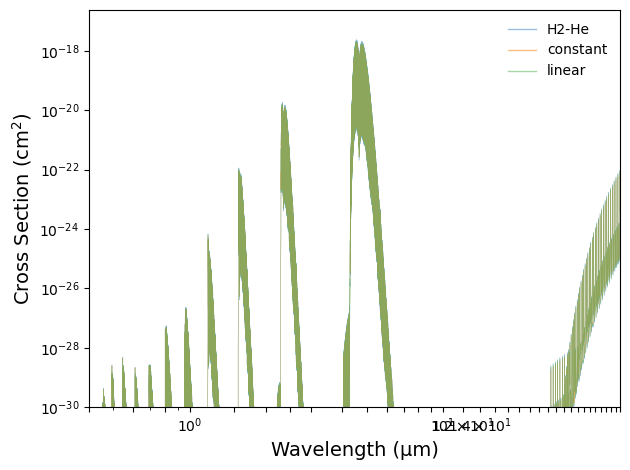

In [7]:
from excalibur.plot import plot_cross_section

'''Plot all 3 cross sections on the same plot'''

plot_cross_section(collection = cross_sections, labels = ['H2-He', 'constant', 'linear'], filename = 'Different_Broadening_Types_for_CO')


We can zoom into the region between 4.26$\mu m$ and 4.29$\mu m$ to show the differences more clearly. We specify the `x_min` and `x_max` parameters accordingly.


Plotting complete.


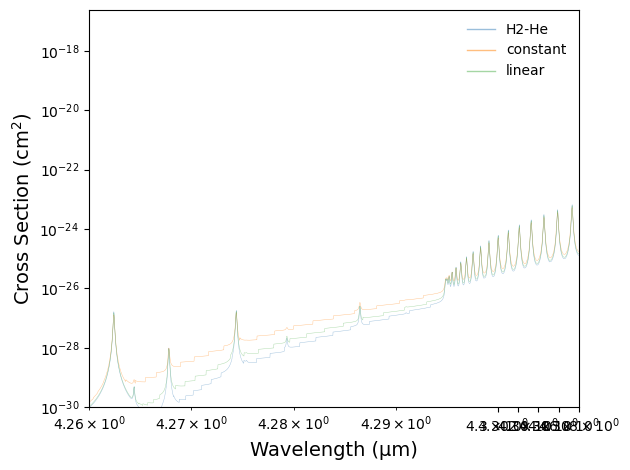

In [9]:
plot_cross_section(collection = cross_sections, labels = ['H2-He', 'constant', 'linear'], 
                   filename = 'Different_Broadening_Types_for_CO_Zoomed', x_min = 4.26, x_max = 4.29)
